# 中央競馬

In [2]:
from modules.constants import local_paths
from modules import predict
import os
import numpy as np
import pandas as pd
import pickle

%load_ext autoreload 

In [3]:
%autoreload

In [4]:
df = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_20_to_21.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str})

In [5]:
df.drop(['weather', 'ground_state'], axis=1, inplace=True)

In [6]:
pd.options.display.max_columns = 300

In [7]:
df.dropna()

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,win_odds,popularity,date,race_type,around,course_len,race_class,place,reference_date,rank_mean,rank_min,rank_max,n_horses_mean,rank_diff_mean,3_furlongs_mean,3_furlongs_median,time_median,prize_mean,prize_sum,course_len_mean,course_len_median,course_len_min,course_len_max,rank_mean_past_2,rank_min_past_2,rank_max_past_2,n_horses_mean_past_2,rank_diff_mean_past_2,3_furlongs_mean_past_2,3_furlongs_median_past_2,time_median_past_2,prize_mean_past_2,prize_sum_past_2,course_len_mean_past_2,course_len_median_past_2,course_len_min_past_2,course_len_max_past_2,rank_mean_past_5,rank_min_past_5,rank_max_past_5,n_horses_mean_past_5,rank_diff_mean_past_5,3_furlongs_mean_past_5,3_furlongs_median_past_5,time_median_past_5,prize_mean_past_5,prize_sum_past_5,course_len_mean_past_5,course_len_median_past_5,course_len_min_past_5,course_len_max_past_5,weather_mode,weather_mode_past_5,weather_mode_past_2,race_type_mode,race_type_mode_past_5,race_type_mode_past_2,ground_state_mode,ground_state_mode_past_5,ground_state_mode_past_2,race_class_mode,race_class_mode_past_5,race_class_mode_past_2,consistency,3f_norm_by_mean,3f_norm_by_median,time_norm_by_mean,time_norm_by_median,consistency_past_2,3f_norm_by_mean_past_2,3f_norm_by_median_past_2,time_norm_by_mean_past_2,time_norm_by_median_past_2,consistency_past_5,3f_norm_by_mean_past_5,3f_norm_by_median_past_5,time_norm_by_mean_past_5,time_norm_by_median_past_5,course_len_mode,rank_mean_in_mode_course_len,rank_min_in_mode_course_len,rank_max_in_mode_course_len,rank_diff_mean_in_mode_course_len,3_furlongs_mean_in_mode_course_len,time_mean_in_mode_course_len,prize_mean_in_mode_course_len,prize_sum_in_mode_course_len,course_len_mode_past_2,rank_mean_in_mode_course_len_past_2,rank_min_in_mode_course_len_past_2,rank_max_in_mode_course_len_past_2,rank_diff_mean_in_mode_course_len_past_2,3_furlongs_mean_in_mode_course_len_past_2,time_mean_in_mode_course_len_past_2,prize_mean_in_mode_course_len_past_2,prize_sum_in_mode_course_len_past_2,course_len_mode_past_5,rank_mean_in_mode_course_len_past_5,rank_min_in_mode_course_len_past_5,rank_max_in_mode_course_len_past_5,rank_diff_mean_in_mode_course_len_past_5,3_furlongs_mean_in_mode_course_len_past_5,time_mean_in_mode_course_len_past_5,prize_mean_in_mode_course_len_past_5,prize_sum_in_mode_course_len_past_5,days_since_last_race,race_interval_category,parent_0,parent_1,parent_2,parent_3,parent_4,parent_5,year,reference_year,jockey_rank_mean,jockey_rank_min,jockey_rank_max,jockey_n_top_1_mean,jockey_n_top_1_sum,jockey_n_top_2_mean,jockey_n_top_2_sum,jockey_n_top_3_mean,jockey_n_top_3_sum,jockey_n_4th_or_below_mean,jockey_n_4th_or_below_sum,jockey_stakes_participation_mean,jockey_stakes_participation_sum,jockey_stakes_win_mean,jockey_stakes_win_sum,jockey_special_participation_mean,jockey_special_participation_sum,jockey_special_win_mean,jockey_special_win_sum,jockey_flat_participation_mean,jockey_flat_participation_sum,jockey_lawn_participation_mean,jockey_lawn_participation_sum,jockey_lawn_win_mean,jockey_lawn_win_sum,jockey_dirt_participation_mean,jockey_dirt_participation_sum,jockey_dirt_win_mean,jockey_dirt_win_sum,jockey_win_proba_mean,jockey_win_proba_max,jockey_top_2_proba_mean,jockey_top_2_proba_max,jockey_top_3_proba_mean,jockey_top_3_proba_max,jockey_earned_prize_mean,jockey_earned_prize_max,jockey_earned_prize_sum,jockey_rank_last_year,jockey_n_top_1_last_year,jockey_n_top_2_last_year,jockey_n_top_3_last_year,jockey_n_4th_or_below_last_year,jockey_stakes_participation_last_year,jockey_stakes_win_last_year,jockey_special_participation_last_year,jockey_special_win_last_year,jockey_flat_participation_last_year,jockey_lawn_participation_last_year,jockey_lawn_win_last_year,jockey_dirt_participation_last_year,jockey_dirt_win_last_year,jockey_win_proba_last_year,jockey_top_2_proba_last_year,jockey_top_3_proba_last_year,jockey_earned_prize_last_year,reference_year_last_year,reference_year_last_

In [8]:
returns = pd.read_csv(os.path.join(local_paths.COMPLETED_DIR, 'returns_22_to_23.csv'), index_col=0 ,sep="\t")
returns

,race_id,単勝_rank,単勝_returns,複勝_rank,複勝_returns,枠連_rank,枠連_returns,馬連_rank,馬連_returns,ワイド_rank,ワイド_returns,馬単_rank,馬単_returns,三連複_rank,三連複_returns,三連単_rank,三連単_returns
0,202206010101,[15],[680],"[15, 10, 4]","[210, 1600, 170]","[5, 8]",[2680],"[10, 15]",[31040],"[10, 15, 4, 15, 4, 10]","[6890, 660, 5640]","[15, 10]",[46070],"[4, 10, 15]",[46240],"[15, 10, 4]",[338400]
1,202206010102,[1],[1510],"[1, 8, 10]","[280, 110, 220]","[1, 4]",[860],"[1, 8]",[1060],"[1, 8, 1, 10, 8, 10]","[520, 1710, 350]","[1, 8]",[3510],"[1, 8, 10]",[2650],"[1, 8, 10]",[21660]
2,202206010103,[5],[430],"[5, 7, 11]","[130, 2620, 110]","[3, 4]",[2750],"[5, 7]",[63780],"[5, 7, 5, 11, 7, 11]","[11540, 180, 8280]","[5, 7]",[82850],"[5, 7, 11]",[24950],"[5, 7, 11]",[224010]
3,202206010104,[5],[630],"[5, 6, 10]","[190, 120, 450]","[5, 6]",[520],"[5, 6]",[580],"[5, 6, 5, 10, 6, 10]","[320, 2520, 1010]","[5, 6]",[1570],"[5, 6, 10]",[5090],"[5, 6, 10]",[24170]
4,202206010105,[8],[190],"[8, 6, 9]","[110, 110, 140]","[6, 8]",[190],"[6, 8]",[240],"[6, 8, 8, 9, 6, 9]","[140, 210, 260]","[8, 6]",[440],"[6, 8, 9]",[320],"[8, 6, 9]",[1210]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,202309050908,[8],[270],"[8, 14, 3]","[160, 170, 650]","[5, 8]",[520],"[8, 14]",[840],"[8, 14, 3, 8, 3, 14]","[440, 1960, 3500]","[8, 14]",[1490],"[3, 8, 14]",[12740],"[8, 14, 3]",[35560]
3452,202309050909,[16],[350],"[16, 9, 14]","[200, 1410, 460]","[5, 8]",[1970],"[9, 16]",[12570],"[9, 16, 14, 16, 9, 14]","[3580, 1190, 6950]","[16, 9]",[15500],"[9, 14, 16]",[46670],"[16, 9, 14]",[144610]
3453,202309050910,[11],[1710],"[11, 6, 9]","[390, 200, 190]","[6, 8]",[630],"[6, 11]",[3770],"[6, 11, 9, 11, 6, 9]","[1160, 1600, 630]","[11, 6]",[8960],"[6, 9, 11]",[7020],"[11, 6, 9]",[68800]
3454,202309050911,[15],[610],"[15, 10, 5]","[170, 110, 170]","[6, 8]",[430],"[10, 15]",[500],"[10, 15, 5, 15, 5, 10]","[290, 720, 280]","[15, 10]",[1410],"[5, 10, 15]",[1420],"[15, 10, 5]",[8900]


In [9]:
df_t = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_22_to_23.csv'), 
                    index_col=0,  sep="\t", dtype={'jockey_id': str, 'trainer_id': str})
df_t.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'rank', 'frame',
       'number', 'sex', 'age', 'impost',
       ...
       'jockey_dirt_win_sum_last_two_years',
       'jockey_win_proba_mean_last_two_years',
       'jockey_win_proba_max_last_two_years',
       'jockey_top_2_proba_mean_last_two_years',
       'jockey_top_2_proba_max_last_two_years',
       'jockey_top_3_proba_mean_last_two_years',
       'jockey_top_3_proba_max_last_two_years',
       'jockey_earned_prize_mean_last_two_years',
       'jockey_earned_prize_max_last_two_years',
       'jockey_earned_prize_sum_last_two_years'],
      dtype='object', length=223)

In [10]:
df_t.drop(['weather', 'ground_state'], axis=1, inplace=True)

## RFmodel

In [125]:
%autoreload

In [ ]:
rf = predict.RFModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.6, 
  max_bet=800, pivot_horse=True, select_features=True, 
  select_num=30, save=False
)
pred_df = rf.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

TypeError: RFModel.__init__() got an unexpected keyword argument 'stochastic_variation'

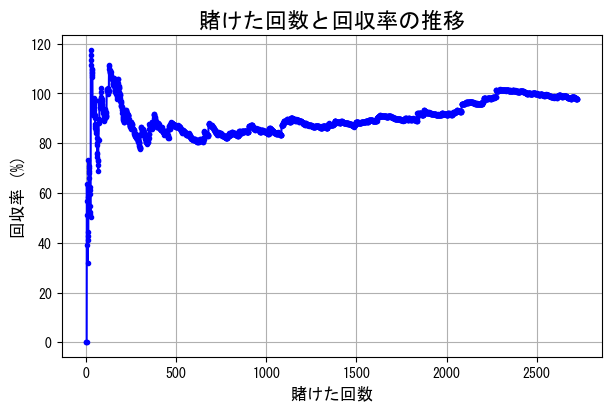

総払い戻し金額: 630820.0円
賭けた回数: 2724回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041902,0.0,100,100,0.0,0.000000,-100.0
1,202330041904,0.0,300,400,0.0,0.000000,-400.0
2,202330041905,0.0,100,500,0.0,0.000000,-500.0
3,202330041907,510.0,300,800,510.0,0.637500,-290.0
4,202330042001,0.0,100,900,510.0,0.566667,-390.0
...,...,...,...,...,...,...,...
2719,202350123012,0.0,100,644700,630820.0,0.978471,-13880.0
2720,202350123107,0.0,600,645300,630820.0,0.977561,-14480.0
2721,202350123108,0.0,1000,646300,630820.0,0.976048,-15480.0
2722,202350123110,0.0,100,646400,630820.0,0.975897,-15580.0


In [ ]:
rf.plot_returns_rate(df_t)

In [28]:
rf_returns = rf.calc_results(df_t)
rf_returns

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041902,0.0,100,100,0.0,0.000000,-100.0
1,202330041904,0.0,300,400,0.0,0.000000,-400.0
2,202330041905,0.0,100,500,0.0,0.000000,-500.0
3,202330041907,510.0,300,800,510.0,0.637500,-290.0
4,202330042001,0.0,100,900,510.0,0.566667,-390.0
...,...,...,...,...,...,...,...
2719,202350123012,0.0,100,644700,630820.0,0.978471,-13880.0
2720,202350123107,0.0,600,645300,630820.0,0.977561,-14480.0
2721,202350123108,0.0,1000,646300,630820.0,0.976048,-15480.0
2722,202350123110,0.0,100,646400,630820.0,0.975897,-15580.0


In [18]:
rf_returns[rf_returns['returns'] > 0]

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
10,202330051109,1210.0,200,5400,1210.0,0.224074,-4190.0
12,202330051708,3230.0,600,6600,4440.0,0.672727,-2160.0
14,202330053010,2140.0,200,7400,6580.0,0.889189,-820.0
167,202330110807,12150.0,600,94400,18730.0,0.198411,-75670.0
279,202342032412,590.0,200,156800,19320.0,0.123214,-137480.0
285,202342052905,1820.0,200,159600,21140.0,0.132456,-138460.0
336,202343011804,9140.0,600,189400,30280.0,0.159873,-159120.0
476,202347072005,1960.0,600,269400,32240.0,0.119673,-237160.0
565,202348032908,1410.0,200,318800,33650.0,0.105552,-285150.0
612,202348071207,20720.0,600,345000,54370.0,0.157594,-290630.0


In [19]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202201010606)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target


## NNmodel

In [34]:
%autoreload

In [35]:
nn = predict.NNModel(train_df=df, returns_df=returns, bet_type='umaren', threshold=0.6, stochastic_variation=False)
pred_df = nn.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[4967 1276]
 [ 982  932]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      6243
           1       0.42      0.49      0.45      1914

    accuracy                           0.72      8157
   macro avg       0.63      0.64      0.63      8157
weighted avg       0.74      0.72      0.73      8157

Accuracy: 0.7231825426014467
predicted_target
0    30238
1    10960
Name: count, dtype: int64
            race_id  horse_id  jockey_id  trainer_id  rank  frame  number  \
0      202330041901      4505        193         321   4.0      1       1   
1      202330041901      4517        186         289   3.0      2       2   
3      202330041901      4294        129         267   8.0      4       4   
4      202330041901       371         89         223   5.0      5       5   
6      202330041901      2851        147         261   7.0      7       7   
...             ...       ...        ...       

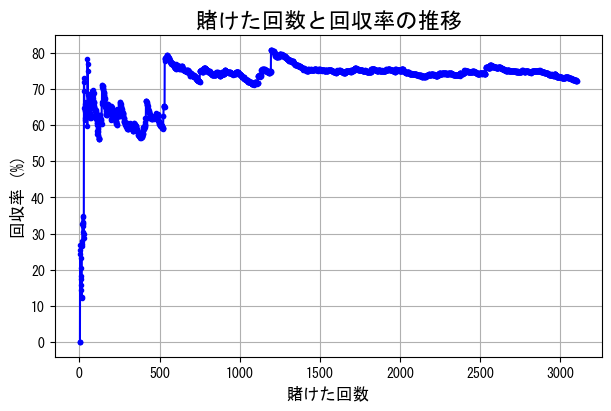

総払い戻し金額: 743160.0円
賭けた回数: 3103回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041903,0.0,300,300,0.0,0.000000,-300.0
1,202330041904,0.0,300,600,0.0,0.000000,-600.0
2,202330041905,0.0,300,900,0.0,0.000000,-900.0
3,202330041907,510.0,1000,1900,510.0,0.268421,-1390.0
4,202330041911,0.0,100,2000,510.0,0.255000,-1490.0
...,...,...,...,...,...,...,...
3098,202350123107,2690.0,1000,1025500,743160.0,0.724681,-282340.0
3099,202350123108,0.0,1000,1026500,743160.0,0.723975,-283340.0
3100,202350123109,0.0,1000,1027500,743160.0,0.723270,-284340.0
3101,202350123110,0.0,600,1028100,743160.0,0.722848,-284940.0


In [36]:
nn.plot_returns_rate(df_t)

## LGBmodel

In [45]:
%autoreload

In [46]:
lgb = predict.LGBModel(train_df=df, returns_df=returns, bet_type='umaren', threshold=0.6, stochastic_variation=False)
pred_df = lgb.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

[LightGBM] [Info] Number of positive: 7682, number of negative: 7682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15316
[LightGBM] [Info] Number of data points in the train set: 15364, number of used features: 177
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 7682, number of negative: 7682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5240
[LightGBM] [Info] Number of data points in the train set: 15364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
 [[5094 1149]
 [ 883 1031]]
Classification Report:
               precision    recall  f1-score   support


       rank_mean_in_mode_course_len_past_5  \
0                                 5.440000   
1                                 8.294118   
3                                 2.000000   
4                                 7.684211   
6                                 8.857143   
...                                    ...   
70192                             5.583333   
70195                             7.500000   
70196                             3.580645   
70197                             4.285714   
70198                             5.225806   

       rank_diff_mean_in_mode_course_len_past_5  \
0                                      1.500000   
1                                      2.829412   
3                                      0.150000   
4                                      2.319737   
6                                      2.342857   
...                                         ...   
70192                                  1.162500   
70195                                  

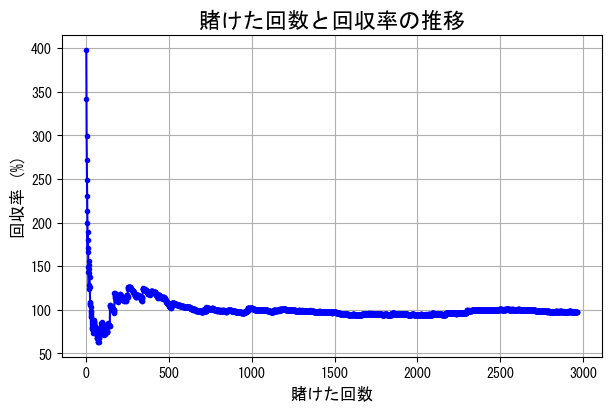

総払い戻し金額: 763980.0円
賭けた回数: 2964回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041905,2390.0,600,600,2390.0,3.983333,1790.0
1,202330041907,0.0,100,700,2390.0,3.414286,1690.0
2,202330042001,600.0,300,1000,2990.0,2.990000,1990.0
3,202330042002,0.0,100,1100,2990.0,2.718182,1890.0
4,202330042007,0.0,100,1200,2990.0,2.491667,1790.0
...,...,...,...,...,...,...,...
2959,202350123012,0.0,100,782000,761290.0,0.973517,-20710.0
2960,202350123103,0.0,100,782100,761290.0,0.973392,-20810.0
2961,202350123107,2690.0,300,782400,763980.0,0.976457,-18420.0
2962,202350123108,0.0,600,783000,763980.0,0.975709,-19020.0


In [47]:
lgb.plot_returns_rate(df_t)

## XGBmodel

In [48]:
%autoreload

In [49]:
xgb = predict.XGBModel(train_df=df, returns_df=returns, bet_type='umaren', threshold=0.6, stochastic_variation=False)
pred_df = xgb.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[5008 1235]
 [ 900 1014]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      6243
           1       0.45      0.53      0.49      1914

    accuracy                           0.74      8157
   macro avg       0.65      0.67      0.66      8157
weighted avg       0.75      0.74      0.75      8157

Accuracy: 0.738261615790119
Selected Feature Importance:
                                            feature  importance
70             rank_mean_in_mode_course_len_past_5    0.039180
73        rank_diff_mean_in_mode_course_len_past_5    0.038382
100                jockey_stakes_participation_sum    0.018938
108                  jockey_flat_participation_sum    0.018309
15                                        rank_min    0.017024
76            prize_mean_in_mode_course_len_past_5    0.016031
93                             jockey_n_top_2_mean    0.015701
71              rank_min_in_mode_course_l

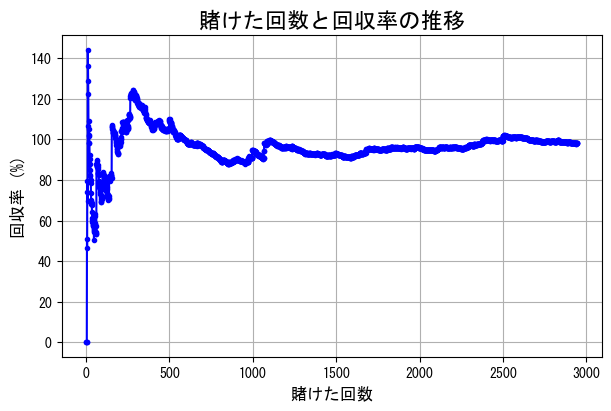

総払い戻し金額: 704780.0円
賭けた回数: 2945回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041901,0.0,100,100,0.0,0.000000,-100.0
1,202330041903,0.0,100,200,0.0,0.000000,-200.0
2,202330041904,0.0,600,800,0.0,0.000000,-800.0
3,202330041905,0.0,100,900,0.0,0.000000,-900.0
4,202330041907,510.0,100,1000,510.0,0.510000,-490.0
...,...,...,...,...,...,...,...
2940,202350123107,2690.0,1000,718000,704780.0,0.981588,-13220.0
2941,202350123108,0.0,100,718100,704780.0,0.981451,-13320.0
2942,202350123109,0.0,300,718400,704780.0,0.981041,-13620.0
2943,202350123110,0.0,600,719000,704780.0,0.980223,-14220.0


In [50]:
xgb.plot_returns_rate(df_t)

## Ensamblemodel

In [13]:
# gitに保存から

In [17]:
%autoreload

In [27]:
en = predict.EnsembleModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.6, 
  max_bet=800, pivot_horse=True, select_features=True, 
  select_num=30, final_model='lgb',save=True,
)
pred_df = en.predict_target(df_t)
print(pred_df['predicted_target'].value_counts())



 training... 


Confusion Matrix:
 [[5862 1328]
 [ 884 1172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      7190
           1       0.47      0.57      0.51      2056

    accuracy                           0.76      9246
   macro avg       0.67      0.69      0.68      9246
weighted avg       0.78      0.76      0.77      9246

Accuracy: 0.7607614103396063
Selected Feature Importance:
                                      feature  importance
0        rank_mean_in_mode_course_len_past_2    0.062566
1       prize_mean_in_mode_course_len_past_2    0.059623
3        rank_mean_in_mode_course_len_past_5    0.045740
19                                  horse_id    0.041388
26                                  parent_5    0.039101
2        prize_sum_in_mode_course_len_past_2    0.038986
9   rank_diff_mean_in_mode_course_len_past_2    0.038976
29                                  parent_0    0.036316
28            

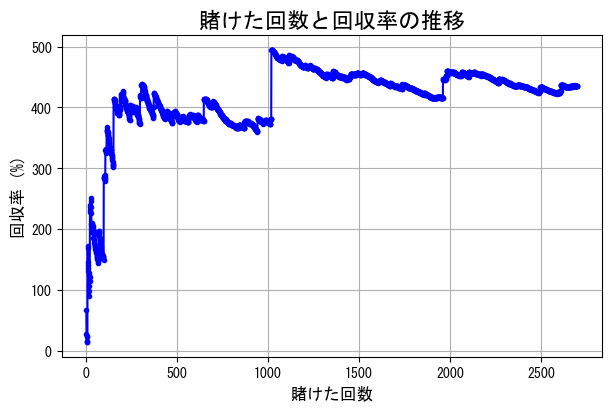

総払い戻し金額: 3500710.0円
賭けた回数: 2698回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010101,200.0,300,300,200.0,0.666667,-100.0
1,202201010102,0.0,400,700,200.0,0.285714,-500.0
2,202201010103,0.0,100,800,200.0,0.250000,-600.0
3,202201010104,0.0,100,900,200.0,0.222222,-700.0
4,202201010106,0.0,300,1200,200.0,0.166667,-1000.0
...,...,...,...,...,...,...,...
2693,202310030706,0.0,100,804300,3498110.0,4.349260,2693810.0
2694,202310030707,0.0,100,804400,3498110.0,4.348720,2693710.0
2695,202310030709,0.0,100,804500,3498110.0,4.348179,2693610.0
2696,202310030802,2600.0,600,805100,3500710.0,4.348168,2695610.0


In [28]:
en.plot_returns_rate(df_t, per_race=False)

In [285]:
en_returns = en.calc_results(df_t, per_race=False)

In [286]:
671  / 2768

0.24241329479768786

In [33]:
en_returns.head(20)

NameError: name 'en_returns' is not defined

In [ ]:
en_returns[en_returns['returns'] > 0].head(20)

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010101,200.0,600,600,200.0,0.333333,-400.0
19,202201010403,9610.0,400,6800,9810.0,1.442647,3010.0
23,202201010508,1500.0,600,8200,11310.0,1.379268,3110.0
24,202201010509,1060.0,100,8300,12370.0,1.490361,4070.0
26,202201010606,2460.0,400,9300,14830.0,1.594624,5530.0
29,202201020101,1460.0,300,10300,16290.0,1.581553,5990.0
32,202201020109,830.0,300,11300,17120.0,1.515044,5820.0
37,202201020204,1680.0,600,13200,18800.0,1.424242,5600.0
41,202201020210,12120.0,600,14600,30920.0,2.117808,16320.0
49,202201020412,2810.0,600,17300,33730.0,1.949711,16430.0


In [147]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202201010101)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
0,202201010101,1.0,0.923570,1
2,202201010101,2.0,0.910135,1
3,202201010101,5.0,0.698386,1
4,202201010101,3.0,0.818284,1


In [145]:
pred_df[pred_df['predicted_proba'] >= 0.85][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
0,202201010101,1.0,0.923570,1
2,202201010101,2.0,0.910135,1
21,202201010103,7.0,0.941704,1
26,202201010103,1.0,0.904281,1
40,202201010104,10.0,0.904884,1
...,...,...,...,...
47113,202310030802,2.0,0.955980,1
47116,202310030802,1.0,0.912627,1
47119,202310030802,3.0,0.876364,1
47147,202310030804,2.0,0.863812,1


In [244]:
pred_df[(pred_df['predicted_proba'] >= 0.85) & (pred_df['rank'] == 1)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
66,202201010106,1.0,0.949900,1
601,202201010503,1.0,0.940648,1
654,202201010507,1.0,0.873339,1
892,202201020101,1.0,0.891271,1
1121,202201020207,1.0,0.859515,1
...,...,...,...,...
46534,202310030408,1.0,0.881263,1
46693,202310030507,1.0,0.899776,1
46789,202310030602,1.0,0.922170,1
46992,202310030704,1.0,0.909107,1


In [242]:
887/2420

0.3665289256198347

# 地方競馬

## Ensenblemodel

In [14]:
%autoreload

In [15]:
df_cs = pd.read_csv(os.path.join(local_paths.FEATURES_CS_DIR, 'features_2022.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str})
df_cs_t = pd.read_csv(os.path.join(local_paths.FEATURES_CS_DIR, 'features_2023.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str})

In [16]:
returns_cs = pd.read_csv(os.path.join(local_paths.COMPLETED_CS_DIR, 'returns.csv'), index_col=0 ,sep="\t")

In [37]:
en = predict.EnsembleModel(
  train_df=df_cs, returns_df=returns_cs, bet_type='sanrenpuku', threshold=0.6, 
  max_bet=800, pivot_horse=True, select_features=True, 
  select_num=30, final_model='lgb', cs=True, save=True
)
pred_df = en.predict_target(df_cs_t)
print(pred_df['predicted_target'].value_counts())



 training... 


Confusion Matrix:
 [[2444  650]
 [ 757  811]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78      3094
           1       0.56      0.52      0.54      1568

    accuracy                           0.70      4662
   macro avg       0.66      0.65      0.66      4662
weighted avg       0.69      0.70      0.70      4662

Accuracy: 0.6981981981981982
Selected Feature Importance:
                                      feature  importance
0        rank_mean_in_mode_course_len_past_2    0.071262
1   rank_diff_mean_in_mode_course_len_past_2    0.051430
2        rank_mean_in_mode_course_len_past_5    0.046766
3       prize_mean_in_mode_course_len_past_2    0.040335
8                              n_horses_mean    0.036759
4   rank_diff_mean_in_mode_course_len_past_5    0.036164
13                  time_norm_by_mean_past_5    0.035140
19                           3_furlongs_mean    0.034539
23            

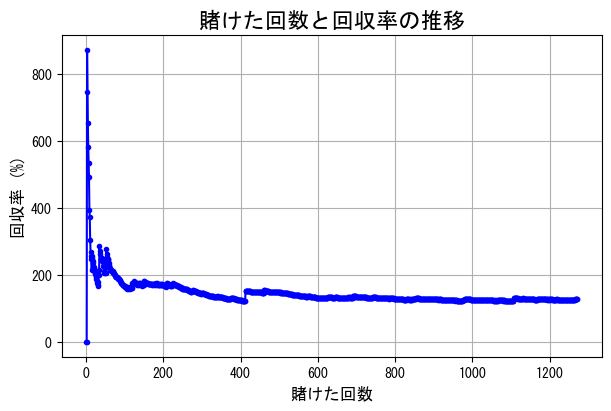

総払い戻し金額: 308560.0円
賭けた回数: 1271回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202330041902,0.0,100,100,0.0,0.000000,-100.0
1,202330041903,0.0,100,200,0.0,0.000000,-200.0
2,202330041905,5230.0,400,600,5230.0,8.716667,4630.0
3,202330042602,0.0,100,700,5230.0,7.471429,4530.0
4,202330042605,0.0,100,800,5230.0,6.537500,4430.0
...,...,...,...,...,...,...,...
1266,202350123107,0.0,400,241200,308560.0,1.279270,67360.0
1267,202350123108,0.0,100,241300,308560.0,1.278740,67260.0
1268,202350123109,0.0,100,241400,308560.0,1.278210,67160.0
1269,202350123110,0.0,400,241800,308560.0,1.276096,66760.0


In [38]:
en.plot_returns_rate(df_cs_t, per_race=False)

In [183]:
# lgb: bet_type = sanrenpuku, select_num = 60, max_bet = 600, threshold = 0.6 | returns_rate = 1.15

In [117]:
len(df_t['race_id'].unique())

6912

In [118]:
en_returns = en.calc_results(df_cs_t, per_race=False)

In [119]:
en_returns['bet_sum'].value_counts()

bet_sum
100    1814
200    1170
300     854
400     266
600      87
500      73
Name: count, dtype: int64

In [243]:
en_returns[en_returns['returns'] > 0].head(20)

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
23,202330051109,300.0,100,5000,300.0,0.060000,-4700.0
26,202330051708,1190.0,400,5900,1490.0,0.252542,-4410.0
30,202330051804,130.0,100,6300,1620.0,0.257143,-4680.0
34,202330051810,380.0,100,6900,2000.0,0.289855,-4900.0
37,202330052408,450.0,100,7200,2450.0,0.340278,-4750.0
47,202330053006,500.0,600,10400,2950.0,0.283654,-7450.0
49,202330053010,780.0,600,11100,3730.0,0.336036,-7370.0
55,202330053112,380.0,300,12600,4110.0,0.326190,-8490.0
71,202330061310,1100.0,600,16100,5210.0,0.323602,-10890.0
73,202330061408,2800.0,100,16300,8010.0,0.491411,-8290.0


# 出馬表からの予想結果

In [ ]:
import pandas as pd
from datetime import datetime

date = datetime.now().strftime('%Y%m%d')

pred_path = 'pred_df-candidates(1)/pred_candidates'

# ファイルのパスを指定して読み込む
pred_candidates_full = pd.read_csv(f'_full_{date}.csv', sep="\t", encoding='utf-8', index_col=0)
pred_candidates = pd.read_csv(f'_{date}.csv', sep="\t", encoding='utf-8', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'pred_df-candidates/pred_candidates_full_20241109.csv'

In [1]:
pred_candidates

NameError: name 'pred_candidates' is not defined

In [ ]:
# トータル収支
-4780

-4780